# Homework 7: Convex programs

Name:      Zihao Qiu  
Email:     zqiu34@wisc.edu  
Campus ID: 9079810942

## 1. Enclosing circle

Generate the points and plot a circle:

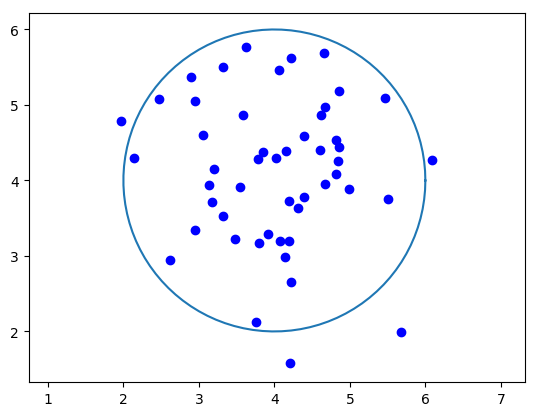

(1.7397062263937673,6.31928593183141,1.326753812133779,6.2222718002627015)

In [3]:
using PyPlot
X = 4 + randn(2, 50)
t = linspace(0, 2*pi, 100)
r = 2; 
x1 = 4; x2 = 4
plot(x1 + r*cos(t), x2 + r*sin(t))
scatter(X[1,:], X[2,:], color="blue")
axis("equal")

The optimization problem can be described as follows:  
$
\begin{align}
 & \min_{xc,yc,R} R \\
 & s.t. ({Xi}_x - xc)^2 + ({Xi}_y - yc)^2 \leq R \quad for\ i = 1:50
\end{align}
$

$R$ is the square of the circle radius.  
xc and yc is the center of the smallest circle.  
${Xi}_x$ is the x coordinate of the ith point and ${Xi}_y$ is the y coordinate of the ith point.

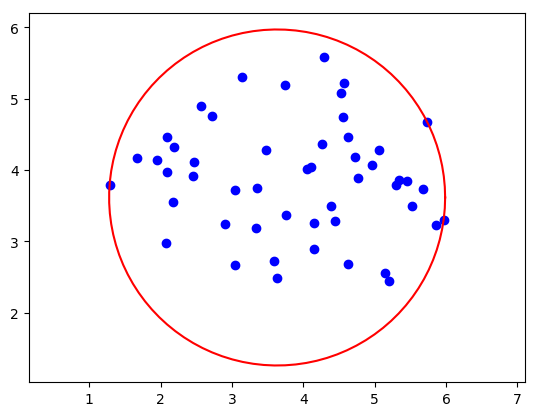

Academic license - for non-commercial use only
xc:3.6323320279308056
yc:3.6159516552125144
r:2.3553265533066687


(1.014707246922618,6.235260999828116,1.025418564050432,6.2064847463745965)

In [14]:
using JuMP, Gurobi

num_points = 50

# generate random points first
X = 4 + randn(2, num_points)

# do optimization
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, xc)   # x coordinate of the circle center
@variable(m, yc)   # y coordinate of the circle center
@variable(m, R)    # radius^2 the circle

for i in 1:num_points
    @constraint(m, (X[1,i]-xc)^2 + (X[2,i]-yc)^2 <= R)
end

@objective(m, Min, R)

solve(m)
xc = getvalue(xc)
yc = getvalue(yc)
r = sqrt(getvalue(R))
println("xc:", xc)
println("yc:", yc)
println("r:", r)

# plot
plot(xc + r*cos(t), yc + r*sin(t), color="red")
scatter(X[1,:], X[2,:], color="blue")
axis("equal")

## 2. The Huber loss

### (a)

Academic license - for non-commercial use only
best fit of least square(include the outliers):
a1:-0.29078571428551947
b1:8.130285714279665


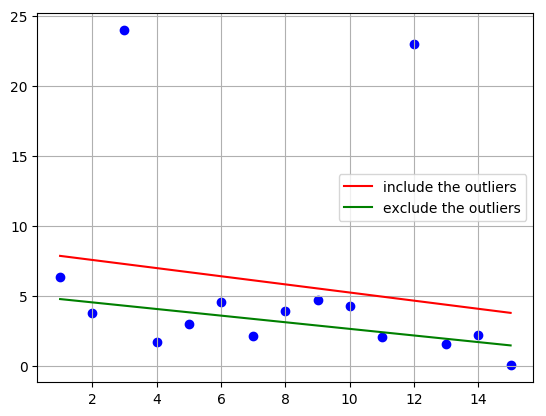

Academic license - for non-commercial use only
best fit of least square(exclude the outliers):
a2:-0.23648422408233874
b2:4.9916033483557305


In [80]:
x = [1:15;]
y = [6.31 3.78 24 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 23 1.58 2.17 0.02]
x_drop_outliers = [1 2 4 5 6 7 8 9 10 11 13 14 15]
y_drop_outliers = [6.31 3.78 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

# include the outliers
m1 = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m1, a1)
@variable(m1, b1)

@objective(m1, Min, sum{(y[i]-a1*x[i]-b1)^2, i=1:15})

solve(m1)

a1 = getvalue(a1)
b1 = getvalue(b1)

println("best fit of least square(include the outliers):")
println("a1:", a1)
println("b1:", b1)

# exclude the outliers
m2 = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m2, a2)
@variable(m2, b2)

@objective(m2, Min, sum{(y_drop_outliers[i]-a2*x_drop_outliers[i]-b2)^2, i=1:13})

solve(m2)

a2 = getvalue(a2)
b2 = getvalue(b2)

println("best fit of least square(exclude the outliers):")
println("a2:", a2)
println("b2:", b2)

scatter(x, y, color="blue")
plot(x, a1*x+b1, color="red", label="include the outliers")
plot(x, a2*x+b2, color="green", label="exclude the outliers")
legend()
grid("on")

You can see that the line which includes the outliers is higher that the line which excludes the outliers. Because the red line affected by the outliers heavily.

### (b)

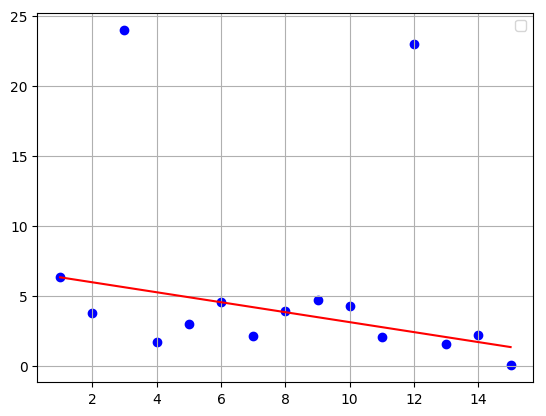

Academic license - for non-commercial use only
best fit of l1 cost function(include the outliers):
a:-0.35599999999999987
b:6.6659999999999995


In [76]:
x = [1:15;]
y = [6.31 3.78 24 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 23 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

# include the outliers
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, a)
@variable(m, b)

# l1-norm
@variable(m, t[1:15])
for i in 1:15
    @constraint(m, y[i]-a*x[i]-b <= t[i])
    @constraint(m, -t[i] <= y[i]-a*x[i]-b)
end

@objective(m, Min, sum(t))

solve(m)

a = getvalue(a)
b = getvalue(b)

println("best fit of l1 cost function(include the outliers):")
println("a:", a)
println("b:", b)

scatter(x, y, color="blue")
plot(x, a*x+b, color="red")
legend()
grid("on")

You can see that l1 cost handle outliers better than least squares.  
We can justify this point by evaluating the errors of $l_2$ cost function and $l_1$ cost function.

In [77]:
error_l2 = 0
error_l1 = 0

for i in 1:13
    error_l2 = error_l2 + (y_drop_outliers[i]-a1*x_drop_outliers[i]-b1)^2
    error_l1 = error_l1 + (y_drop_outliers[i]-a*x_drop_outliers[i]-b)^2
end
println("error_l2:", error_l2)
println("error_l1:", error_l1)

error_l2:115.98970497417054
error_l1:30.457700000000003


### (c)

First plot the Huber loss function of the convex QP form:

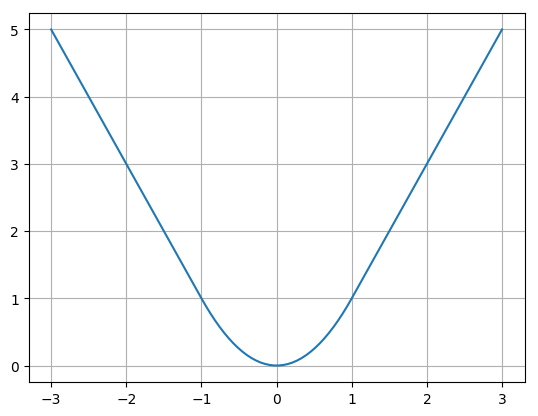

Academic license - for non-commercial use only


In [78]:
using JuMP, Gurobi, PyPlot

M = 1

X = linspace(-3, 3, 100)
y = []

m = Model(solver=GurobiSolver(OutputFlag=0))

function HuberLoss(x)
    @variable(m, v >= 0)
    @variable(m, w <= M)

    @constraint(m, x <= w+v)
    @constraint(m, -w-v <= x)
    
    @objective(m, Min, w^2 + 2*M*v)

    solve(m)
    
    return getobjectivevalue(m)
end

for x in X 
    push!(y, HuberLoss(x))
end

plot(X, y)
grid("on")

Then find the best linear fit to the data using Huber loss with M=1.  
The optimization problem can be written as follows:  
$
\begin{align}
 & \min_{a,b,v,w} \sum_{i=1}^{15} {w_i}^2 + 2M v_i \\
  s.t.\ &|y_i -a x_i -b | \leq w_i + v_i \quad for\ i=1:15 \\
        & v_i \geq 0  \\
        & w_i \leq M
\end{align}
$

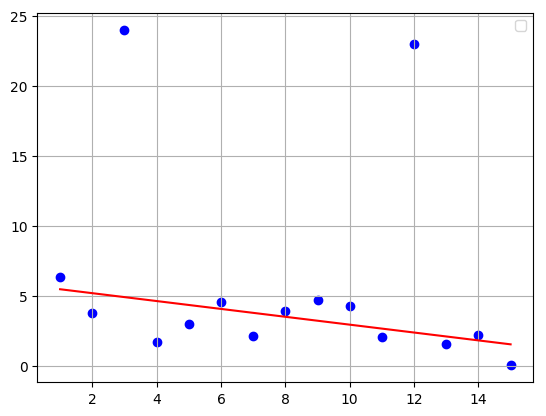

Academic license - for non-commercial use only
best fit of Huber loss(include the outliers):
a:-0.2811079944855355
b:5.738120618284127


In [79]:
x = [1:15;]
y = [6.31 3.78 24 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 23 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

M = 1
mh = Model(solver=GurobiSolver(OutputFlag=0))

@variable(mh, a)
@variable(mh, b)
@variable(mh, v[1:15] >= 0)
@variable(mh, w[1:15] <= M)

for i in 1:15
    @constraint(mh, y[i]-a*x[i]-b <= w[i]+v[i])
    @constraint(mh, -w[i]-v[i] <= y[i]-a*x[i]-b)
end

@objective(mh, Min, sum{w[i]^2+2*M*v[i], i=1:15})

solve(mh)

a = getvalue(a)
b = getvalue(b)

println("best fit of Huber loss(include the outliers):")
println("a:", a)
println("b:", b)

scatter(x, y, color="blue")
plot(x, a*x+b, color="red")
legend()
grid("on")

## 3. Heat pipe design

### (a)

The flow of the fluid depends on the flow velocity and the area of the cross section, so it can be expressed as follows:

$\alpha_4 T r^2 * \pi r^2 = \alpha_4 \pi T r^4$

So the geometric program is:

$
\begin{align}
 & \max_{T,r,w} \alpha_4 \pi T r^4 \\
  s.t.\ & T_{min} \leq T \leq T_{max} \\
        & r_{min} \leq r \leq r_{max} \\
        & w_{min} \leq w \leq w_{max} \\
        & w \leq 0.1r \\
        & \alpha_1 \frac{Tr}{w} + \alpha_2 r + \alpha_3 rw \leq C_{max}
\end{align}
$

Then it can be written as:

$
\begin{align}
 & -\alpha_4 \pi\ \min_{T,r,w} -T r^4 \\
  s.t.\ & \frac{T_{min}}{T} \leq 1 \quad \frac{T}{T_{max}} \leq 1 \\
        & \frac{r_{min}}{r} \leq 1 \quad \frac{r}{r_{max}} \leq 1 \\
        & \frac{w_{min}}{w} \leq 1 \quad \frac{w}{w_{max}} \leq 1 \\
        & \frac{10w}{r} \leq 1 \\
        & \frac{\alpha_1 Tr}{C_{max} w} + \frac{\alpha_2 r}{C_{max}} + \frac{\alpha_3 rw}{C_{max}} \leq 1
\end{align}
$

Apply log to both left hand side and right hand side, we will have:

$
\begin{align}
 & -\alpha_4 \pi\ \min_{T,r,w} -(\log T + 4\log r) \\
  s.t.\ & \log{T_{min}} - \log{T} \leq 0 \quad \log{T} - \log{T_{max}} \leq 0 \\
        & \log{r_{min}} - \log{r} \leq 0 \quad \log{r} - \log{r_{max}} \leq 0 \\
        & \log{w_{min}} - \log{w} \leq 0 \quad \log{w} - \log{w_{max}} \leq 0 \\
        & \log10 +\log w - \log{r} \leq 0 \\
        & \log{(e^{\log{\frac{\alpha_1}{C_{max}}} +\log T +\log r -\log w} + e^{\log{\frac{\alpha_2}{C_{max}}} + \log r} + e^{\log{\frac{\alpha_3}{C_{max}}} +\log r +\log w})} \leq 0
\end{align}
$

Let's move on, let $x=\log T$, $y=\log r$ and $z=\log w$, we will get:

$
\begin{align}
 & -\alpha_4 \pi\ \min_{x,y,z} -(x + 4y) \\
  s.t.\ & \log{T_{min}} - x \leq 0 \quad x - \log{T_{max}} \leq 0 \\
        & \log{r_{min}} - y \leq 0 \quad y - \log{r_{max}} \leq 0 \\
        & \log{w_{min}} - z \leq 0 \quad z - \log{w_{max}} \leq 0 \\
        & \log10 +z - y \leq 0 \\
        & \log{(e^{\log{\frac{\alpha_1}{C_{max}}} +x +y -z} + e^{\log{\frac{\alpha_2}{C_{max}}} + y} + e^{\log{\frac{\alpha_3}{C_{max}}} +y +z})} \leq 0
\end{align}
$

It's a convex optimization problem.

### (b)

Assume that each variable has a lower bound 0 and no upper bound and let $C_{max}=500$ and $\alpha_1 = \alpha_2 = \alpha_3 = \alpha_4 = 1$, we will have:

$
\begin{align}
 & -\pi\ \min_{x,y,z} -(x + 4y) \\
  s.t.\ & \log10 +z - y \leq 0 \\
        & \log{(e^{\log{\frac{1}{500}} +x +y -z} + e^{\log{\frac{1}{500}} + y} + e^{\log{\frac{1}{500}} +y +z})} \leq 0
\end{align}
$

In [14]:
using JuMP, Mosek

m = Model(solver=MosekSolver(LOG=0))

@variable(m, x)
@variable(m, y)
@variable(m, z)

@constraint(m, log(10) + z - y <= 0)
@NLconstraint(m, exp(-log(500) + x + y -z) + exp(-log(500) + y) + exp(-log(500) + y + z) <= 1)

@objective(m, Min, -(x + 4y))

solve(m)

x = getvalue(x)
y = getvalue(y)
z = getvalue(z)

println("x:", x)
println("y:", y)
println("z:", z)

println()

T = exp(x)
r = exp(y)
w = exp(z)

println("T:", T)
println("r:", r)
println("w:", w)

println("heat:", -pi*getobjectivevalue(m))

x:-1.3862943748890606
y:5.521460910997822
z:-0.6931472068277381

T:0.24999999655770752
r:249.99999828389397
w:0.49999998686610375
heat:65.02955191643153


In [15]:
T*r/w + r + r*w

499.9999948466418